**Market Basket Analysis with Apriori Algorithm**

https://www.kaggle.com/code/prasad22/market-basket-analysis-with-apriori-algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image

from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv')
df.shape

(38765, 3)

In [5]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [9]:
df.Member_number.nunique()
df.itemDescription.nunique()
df.Date.nunique()
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [10]:
df["itemDescription"].value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

📝 Market Basket Analysis:
Market Basket Analysis stands as a crucial technique employed by major retailers to unveil connections among products. This method involves searching for combinations of items that frequently appear together in customer transactions. In simpler terms, it empowers retailers to pinpoint correlations between the items purchased by customers.

Association Rules are widely used to analyze retail basket or transaction data and are intended to identify strong patterns discovered in transaction data.

In [11]:
# Using groupby function to create a basket df, which specifies if an item is bought by particular Member
# for all items and all Members
# this will denote the tranasaction happened in the particular day which needs to be fixed

basket = (df.groupby(['Member_number','itemDescription'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_number'))

In [12]:
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [13]:
#We are getting the per day transactions (example : 2,4,3) while we just want to know if that particular item is purchased or not
#thus we are encoding units as 1(if purchased) or 0(not purchased)

def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Association Rule Mining :
Association rule mining is a process that deploys pattern recognition to identify and quantify relationship between different, yet related items.

A simple association rules use case -

Eggs and Bread are frequently purchased together. With this finding, you can increase sales by:

Placing eggs and bread next to each other so that when a customer buys one of the products, they don't have to walk to buy the other product
Advertising to buyer of either eggs or bread in order to increase that person's propensity to purchase the (paired) other product.
Offer discounts on both eggs and bread if the customer buys both of them in one purchase.
Association Rule: "if item eggs are purchased,then the possibility of buying bread is __"

Can also be represented as:

{eggs} -> {bread}
Advantages :
Relatively fast method
Works well on small quantities of data
Few(if any) feature engineering requirement
Three Ways to Measure Association :
Support
Confidence
Lift
Illustration with an Example :
Scenario : 5000 Total transaction in a supermarket - A = Bread Purchases = 500 Transactions - C = Eggs Purchases = 350 Transactions - (A->C) = Both Bread and Eggs Purchased = 150 Transactions
Support :
Support is a relative frequency of an item wthin a dataset.It basically expresses how popular the item is as represented by its proportion to the total items sold.
Support for an item can be calculated as support(A->C) = Support (A ∪ C)

Example:
Support(Bread) = (Number of Transactions Containing the Bread) / (Total Number of Transactions)
Support(Bread) = 500/5000 = 0.1
Confidence :
Confidence is the probability of seeing the consequent item (a "then" term) within data, given that the data also contains the antecendent (the "if" term) item
In other words, confidence tells you (THEN) How likely it is for 1 item to be purchased given that, (IF) another item is purchased.
Confidence determines how many if-then statements are found to be true within a dataset
Confidence(A -> C) = (Support(A -> C)) / (Support(A))

Where
A - antecedent
C - consequent

Using the same example, the ;likelihood of buying eggs if bread are bought is :
Confidence(Bread -> Eggs) = (150/5000) / (500/5000) = 0.3 = 30%
So, there is 30% likelihood that eggs will be bought if bread is purchased.
Lift :
Lift is a metric that measures how much more often the antecedent and consequent occur together rather than them occuring independently.

Lift(A -> C) = (Confidence(A -> C)) / (Support(C))

Lift score >1: A is hightly associated with C. If A purchased, then it is highly likely that C will also be purchased.

Lift score <1: If A purchased, then it is unlikely that C will be purchased.
Lift score =1: Indicates that there is no association between items A and C.
Lift(Bread -> Eggs) = 0.3 / (350/5000) = 4.28
With a lift of 4.28, your rule would be "If a customer buys bread, then they're likely to also buy eggs".
The Apriori Algorithm is the algorithm that you use to implment association rule mining over structured data.

In [15]:
# trying out on a sample item
whole_milk_df = basket.loc[basket['whole milk']==1]

In [16]:
# Using apriori algorithm, creating association rules for the sample item

# Applying apriori algorithm for whole_milk_df
frequent_itemsets = apriori(whole_milk_df, min_support=0.15, use_colnames=True)

In [17]:
# Storing the association rules into rules
whole_milk_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [18]:
# Sorting the rules on lift and support
whole_milk_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
1,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
2,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
3,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
4,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
5,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
6,(other vegetables),(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163
7,(rolls/buns),(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954
8,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163
9,"(whole milk, rolls/buns)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954


In [19]:
# Creating a new function in which we pass an item name and it returns the items which are frequently bought together
# In other words, it returns the items which are likely to be bought by user because he bought the item passed into function

def frequently_bought_together(item):

    # df of item passed
    item_df = basket.loc[basket[item]==1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [20]:
# Example 1
frequently_bought_together('salty snack')

Items frequently bought together with salty snack


array([frozenset({'bottled beer'}), frozenset({'salty snack'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [21]:
frequently_bought_together('ice cream')

Items frequently bought together with ice cream


array([frozenset({'beef'}), frozenset({'ice cream'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [22]:
frequently_bought_together('chewing gum')

Items frequently bought together with chewing gum


array([frozenset({'beef'}), frozenset({'chewing gum'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'whole milk'}), frozenset({'butter'})], dtype=object)

In [23]:
df[df['Member_number']==2222]

,Member_number,Date,itemDescription
1631,2222,08-01-2015,yogurt
3796,2222,21-07-2015,berries
4881,2222,28-12-2015,whole milk
8433,2222,28-12-2015,sausage
10571,2222,13-02-2014,grapes
11296,2222,03-04-2014,pork
14695,2222,31-07-2014,sugar
15709,2222,21-07-2015,other vegetables
17780,2222,08-01-2015,dental care
19945,2222,21-07-2015,butter


In [24]:
support=whole_milk_rules.support.values
confidence=whole_milk_rules.confidence.values

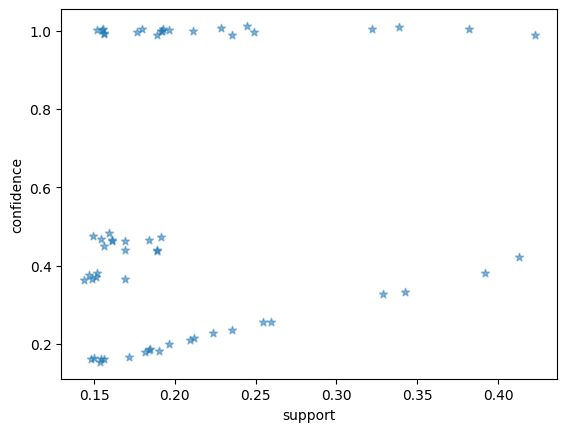

In [25]:
import networkx as nx
import random
import matplotlib.pyplot as plt

for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5)
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

# Creating a scatter plot of support v confidence
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

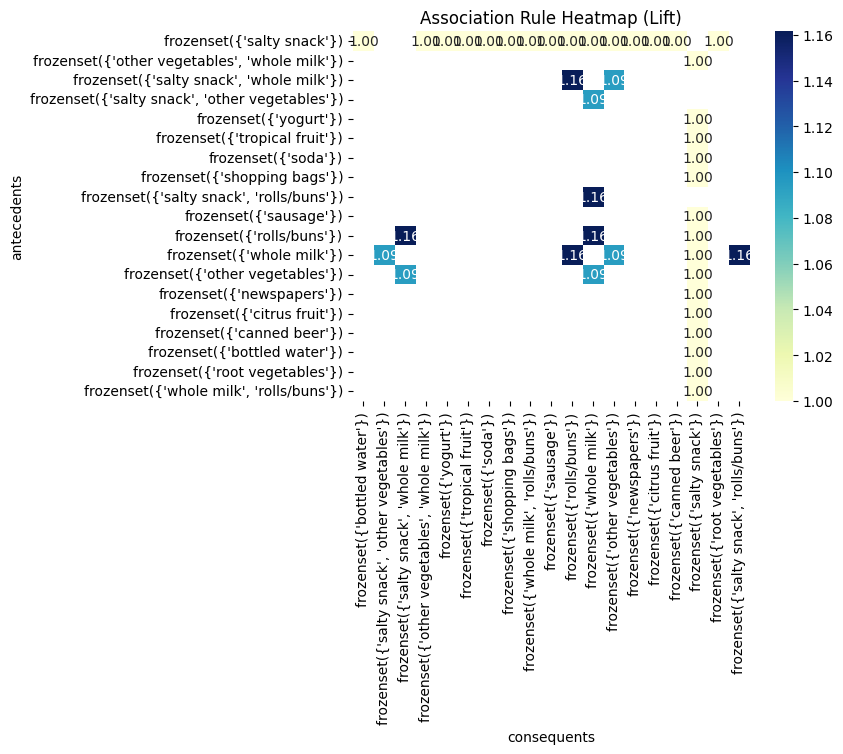

In [26]:
import seaborn as sns

cat_df = basket.loc[basket['salty snack']==1]
frequent_itemsets = apriori(cat_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Create a DataFrame for visualization
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Association Rule Heatmap (Lift)')
plt.show()